*Goal*: find out if the dataset fits the data requirements

*Data Requirements*:
* user activity is >80% of all time intervals
* month 1, user has >5 rates
* month 0, to pre-train model
* items are comparable
* timestamp
* implicit feedback
* ranking problem


In [2]:
import os
import sys
sys.path.append(os.path.abspath('') + '/..')

import pandas as pd
from dataset_evaluation_utils import *

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# import plotly.offline as py
# pd.options.plotting.backend = "plotly"
# py.init_notebook_mode() # graphs charts inline (IPython).

a4_dims = (11.7, 8.27)



___

# LastFM

2k users

timestamps from when the tag was done

https://grouplens.org/datasets/hetrec-2011/


## define variables

In [30]:
dataset_name = 'LastFM'
user_col = 'user_id'
item_col = 'artist_id'
tag_col = 'tag_id'
rate_col = None # implicit
time_col = None

## read data

In [4]:
user_artists = pd.read_csv("../datasets/hetrec2011-lastfm-2k/user_artists.dat", 
                      sep='\t')
user_artists.columns = [ user_col, item_col, 'count']
user_artists

,user_id,artist_id,count
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [14]:
artists = pd.read_csv("../datasets/hetrec2011-lastfm-2k/artists.dat", 
                      sep='\t')
# artists.columns = [ user_col, item_col, 'count']
artists

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...
...,...,...,...,...
17627,18741,Diamanda Galás,http://www.last.fm/music/Diamanda+Gal%C3%A1s,http://userserve-ak.last.fm/serve/252/16352971...
17628,18742,Aya RL,http://www.last.fm/music/Aya+RL,http://userserve-ak.last.fm/serve/252/207445.jpg
17629,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,http://userserve-ak.last.fm/serve/252/344868.jpg
17630,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,http://userserve-ak.last.fm/serve/252/29297695...


In [18]:
# tags = pd.read_csv("../datasets/hetrec2011-lastfm-2k/tags.dat",sep='\t')
# # tags.columns = [ user_col, item_col, 'count']
# tags      

In [19]:
user_friends = pd.read_csv("../datasets/hetrec2011-lastfm-2k/user_friends.dat", 
                      sep='\t')
# user_friends.columns = [ user_col, item_col, 'count']
user_friends

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831
...,...,...
25429,2099,1801
25430,2099,2006
25431,2099,2016
25432,2100,586


In [21]:
user_taggedartists = pd.read_csv("../datasets/hetrec2011-lastfm-2k/user_taggedartists.dat", 
                      sep='\t')
user_taggedartists.columns = [ user_col, item_col, tag_col, 'day', 'month', 'year']
user_taggedartists

,user_id,artist_id,tag_id,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009
...,...,...,...,...,...,...
186474,2100,16437,4,1,7,2010
186475,2100,16437,292,1,5,2010
186476,2100,16437,2087,1,7,2010
186477,2100,16437,2801,1,5,2010


In [22]:
user_taggedartists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186479 entries, 0 to 186478
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    186479 non-null  int64
 1   artist_id  186479 non-null  int64
 2   tag_id     186479 non-null  int64
 3   day        186479 non-null  int64
 4   month      186479 non-null  int64
 5   year       186479 non-null  int64
dtypes: int64(6)
memory usage: 8.5 MB


# Removed the tag col so that the data became tagged artists at given time

In [23]:
orig_df = user_taggedartists[[user_col, item_col, 'day', 'month', 'year']].drop_duplicates()
orig_df

,user_id,artist_id,day,month,year
0,2,52,1,4,2009
5,2,63,1,4,2009
9,2,73,1,4,2009
17,2,94,1,4,2009
25,2,96,1,4,2009
...,...,...,...,...,...
186469,2100,8322,1,5,2009
186472,2100,8322,1,12,2009
186473,2100,13978,1,6,2009
186474,2100,16437,1,7,2010


In [24]:
data_clean = orig_df.copy()

print('is there duplicated interactions user A, item alpha, rate x, time z? ', data_clean.duplicated().any())
print('duplicate entries NOT deleted')

is there duplicated interactions user A, item alpha, rate x, time z?  False
duplicate entries NOT deleted


In [26]:
print('is there any re-tagging? ', data_clean[[user_col, item_col]].duplicated().any())

is there any re-tagging?  True


2010    22913
2009    19789
2008    19649
2007    10052
2011     6238
2006     5157
2005     1213
1956        2
1979        1
1957        1
Name: year, dtype: int64


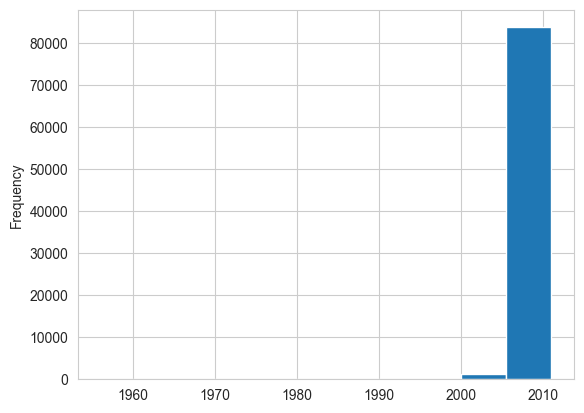

In [27]:
print(data_clean['year'].value_counts())
data_clean['year'].plot(kind='hist');

In [28]:
data_clean['year-month'] = data_clean[['year','month']].apply(lambda x: datetime.strptime( str(x.year)+'-'+str(x.month), '%Y-%m'), axis=1)
data_clean.head()

,user_id,artist_id,day,month,year,year-month
0,2,52,1,4,2009,2009-04-01
5,2,63,1,4,2009,2009-04-01
9,2,73,1,4,2009,2009-04-01
17,2,94,1,4,2009,2009-04-01
25,2,96,1,4,2009,2009-04-01


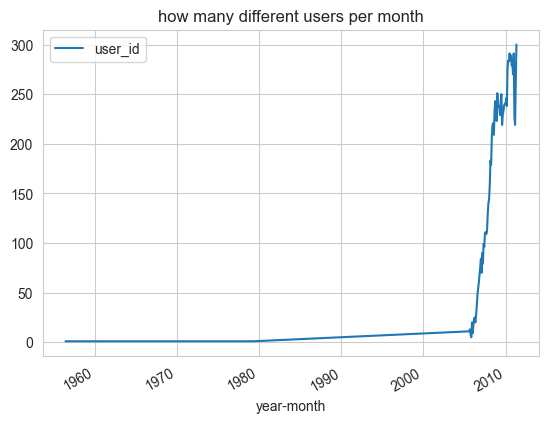

In [31]:
time_col = 'year-month'
data_clean[[user_col, time_col]]\
    .drop_duplicates()\
        .groupby(time_col)\
            .count().plot(title='how many different users per month');

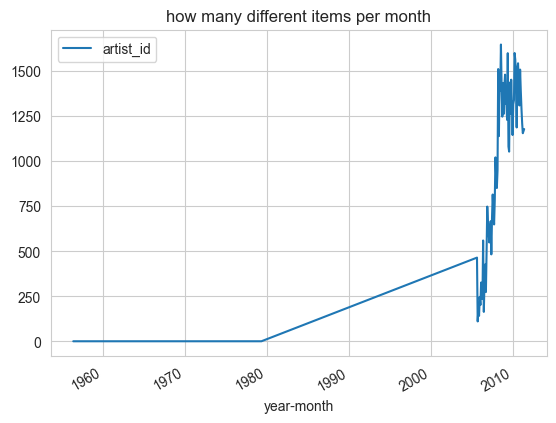

In [32]:
data_clean[[item_col, time_col]]\
    .drop_duplicates()\
        .groupby(time_col)\
            .count().plot(title='how many different items per month');

In [37]:
data_clean['user-item'] = data_clean.apply(lambda x: str(x[user_col])+'-'+str(x[item_col]), axis=1)
data_clean

,user_id,artist_id,day,month,year,year-month,user-item
0,2,52,1,4,2009,2009-04-01,2-52
5,2,63,1,4,2009,2009-04-01,2-63
9,2,73,1,4,2009,2009-04-01,2-73
17,2,94,1,4,2009,2009-04-01,2-94
25,2,96,1,4,2009,2009-04-01,2-96
...,...,...,...,...,...,...,...
186469,2100,8322,1,5,2009,2009-05-01,2100-8322
186472,2100,8322,1,12,2009,2009-12-01,2100-8322
186473,2100,13978,1,6,2009,2009-06-01,2100-13978
186474,2100,16437,1,7,2010,2010-07-01,2100-16437


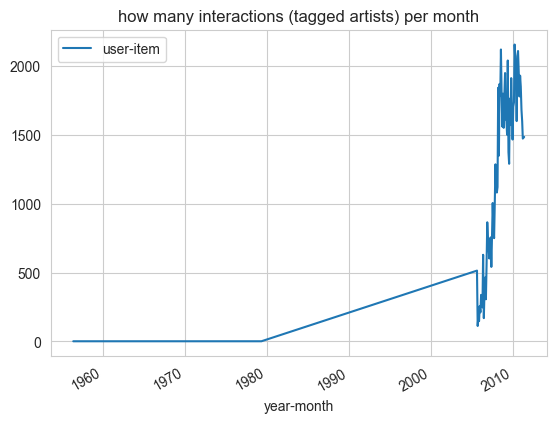

In [40]:
data_clean[['user-item', time_col]]\
        .groupby(time_col)\
            .count().plot(title='how many interactions (tagged artists) per month');

In [43]:
data_clean['date'] = data_clean[['day','year','month']].apply(lambda x: datetime.strptime( str(x.year)+'-'+str(x.month)+'-'+str(x.day), '%Y-%m-%d'), axis=1)

In [44]:
data_clean.head()

,user_id,artist_id,day,month,year,year-month,user-item,date
0,2,52,1,4,2009,2009-04-01,2-52,2009-04-01
5,2,63,1,4,2009,2009-04-01,2-63,2009-04-01
9,2,73,1,4,2009,2009-04-01,2-73,2009-04-01
17,2,94,1,4,2009,2009-04-01,2-94,2009-04-01
25,2,96,1,4,2009,2009-04-01,2-96,2009-04-01


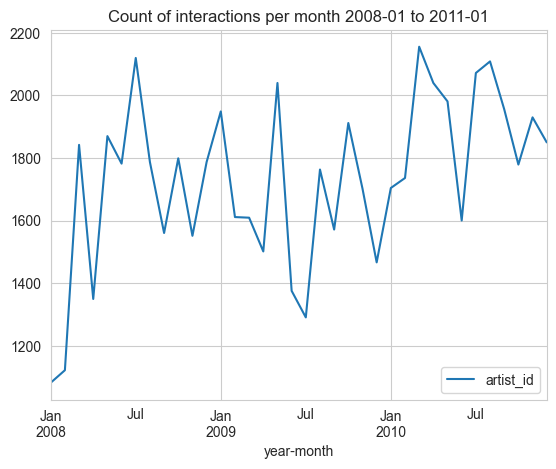

In [49]:
d, _, _, _ = sample_time_period(['2008-01', '2011-01'], data_clean, item_col)

In [57]:
d.head()

,user_id,artist_id,day,month,year,year-month,user-item,date
0,2,52,1,4,2009,2009-04-01,2-52,2009-04-01
5,2,63,1,4,2009,2009-04-01,2-63,2009-04-01
9,2,73,1,4,2009,2009-04-01,2-73,2009-04-01
17,2,94,1,4,2009,2009-04-01,2-94,2009-04-01
25,2,96,1,4,2009,2009-04-01,2-96,2009-04-01


In [52]:
user_presence_df, user_month_interactions,\
    trimestres, user_trimestre_interactions,\
        semestres, user_semestre_interactions = get_interactions_info(d, user_col, quarter_info=True, semester_info=True)

0.0 %
50.0 %


In [53]:
user_presence_df

,UserID,month_%,trimestre_%,semestre_%
0,90,1.000000,1.000000,1.000000
1,439,1.000000,1.000000,1.000000
2,743,0.916667,1.000000,1.000000
3,225,0.916667,1.000000,1.000000
4,1907,0.888889,1.000000,1.000000
...,...,...,...,...
1693,946,0.027778,0.083333,0.166667
1694,374,0.027778,0.083333,0.166667
1695,1369,0.027778,0.083333,0.166667
1696,1761,0.027778,0.083333,0.166667


In [54]:
user_month_interactions

,user_id,date,count
4411,1082,2008-01-01,36
8018,1981,2008-01-01,2
4197,1024,2008-01-01,1
5135,1245,2008-01-01,3
4168,1021,2008-01-01,77
...,...,...,...
1332,328,2010-12-01,1
6392,1604,2010-12-01,5
3932,960,2010-12-01,1
6402,1613,2010-12-01,2


In [59]:
trimestres[:5]

[(Timestamp('2008-01-01 00:00:00'),
  Timestamp('2008-03-31 00:00:00', freq='3M')),
 (Timestamp('2008-04-01 00:00:00'),
  Timestamp('2008-06-30 00:00:00', freq='3M')),
 (Timestamp('2008-07-01 00:00:00'),
  Timestamp('2008-09-30 00:00:00', freq='3M')),
 (Timestamp('2008-10-01 00:00:00'),
  Timestamp('2008-12-31 00:00:00', freq='3M')),
 (Timestamp('2009-01-01 00:00:00'),
  Timestamp('2009-03-31 00:00:00', freq='3M'))]

In [56]:
user_trimestre_interactions

,0,1,2,3,4,5,6,7,8,9,10,11
1082,3.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1981,3.0,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1024,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,3.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,2.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
user_semestre_interactions

,0,1,2,3,4,5
1082,5.0,3.0,1.0,1.0,0.0,0.0
1981,5.0,4.0,0.0,1.0,0.0,0.0
1024,3.0,1.0,1.0,0.0,0.0,0.0
1245,5.0,2.0,1.0,0.0,0.0,0.0
1021,2.0,2.0,4.0,2.0,4.0,5.0
...,...,...,...,...,...,...
1354,0.0,0.0,0.0,0.0,0.0,1.0
963,0.0,0.0,0.0,0.0,0.0,1.0
703,0.0,0.0,0.0,0.0,0.0,1.0
1607,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
frequent_users = get_frequent_users(user_presence_df, frequency_threshold=0.8)
frequent_users

15 users of 1698 (0.883%) occurr in 80.0% or more months.
53 users of 1698 (3.121%) occurr in 80.0% or more quarters.
140 users of 1698 (8.245%) occurr in 80.0% or more semesters.


(array([  90,  439,  743,  225, 1907,  747, 2019, 1202,  297,  190,  492,
         544,  715,  405,  926], dtype=int64),
 array([  90,  439,  743,  225, 1907,  747, 2019, 1202,  297,  190,  492,
         544,  715,  405,  926, 1455,  387, 1223,  546,  406, 1283, 1639,
        1172, 1689, 1650,  699, 1161,  364,  117,   40,  567, 1230, 1171,
        1342, 2099, 1060,   59, 1951, 1875, 1079, 1150,  697, 1974, 1267,
         761, 1021, 1637, 1277, 1975,  860,  836,  812, 1669], dtype=int64),
 array([  90,  439,  743,  225, 1907,  747, 2019, 1202,  297,  190,  492,
         544,  715,  405,  926, 1455,  387, 1223,  546,  406, 1283, 1639,
        1172, 1689, 1030, 1650,  685,  699, 1161,  364, 2030,  117,   40,
         567, 1874, 1230, 1171, 1342, 1152, 2099, 1060,   59, 2055, 1951,
        1875, 1079, 1711, 1150,  545, 2021,  697, 1965, 1974, 1267,  761,
        1535,  541,  906,  159,  979, 1021,  922, 1637, 1277, 1975, 1108,
        1900,  317,  860,  307, 1335, 1517,  936, 1622, 1222, 

In [81]:
user_filter = user_semestre_interactions.index.isin(frequent_users[2])
print('number of interactions, of the active users, in each semester')
user_semestre_interactions[user_filter].sum()

number of interactions, of the active users, in each semester


0    375.0
1    484.0
2    527.0
3    448.0
4    402.0
5    345.0
dtype: float64

In [92]:
lastfm = d.loc[d[user_col].isin(frequent_users[2]), [user_col, item_col, 'date']]
lastfm['timestamp'] = lastfm.date.values.astype(np.int64) // 10 ** 9
lastfm.head()

,user_id,artist_id,date,timestamp
2297,25,67,2008-01-01,1199145600
2298,25,155,2009-11-01,1257033600
2299,25,155,2008-01-01,1199145600
2300,25,157,2009-11-01,1257033600
2302,25,157,2009-06-01,1243814400


In [93]:
output_path = 'output/lastfm_2k_dump/'
sample = 'sample_2008-01_until_2011-01'

joblib.dump(lastfm, output_path+sample+'_lastfm.joblib')
joblib.dump(user_presence_df, output_path+sample+'_user_presence_df.joblib')
joblib.dump(user_month_interactions, output_path+sample+'_user_month_interactions.joblib')
joblib.dump(trimestres, output_path+sample+'_trimestres.joblib')
joblib.dump(user_trimestre_interactions, output_path+sample+'_user_trimestre_interactions.joblib')
joblib.dump(semestres, output_path+sample+'_semestres.joblib')
joblib.dump(user_semestre_interactions, output_path+sample+'_user_semestre_interactions.joblib')
joblib.dump(frequent_users, output_path+sample+'_frequent_users.joblib')

['output/lastfm_2k_dump/sample_2008-01_until_2011-01_frequent_users.joblib']